In [2]:
import importlib

import utils

importlib.reload(utils)
from utils import fit_accuracy_from_task_loss, fit_task_loss_from_ladder_models, plot_actual_vs_predicted, plot_fit

/Users/nikilravi/miniconda3/envs/crfm_new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-30 02:53:13,692	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [26]:
ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
RUNS = [
    "tootsie-scaling-512-81c36c",
    "tootsie-scaling-768-d17a90",
    "tootsie-scaling-1024-f4e4be",
    "tootsie-scaling-1536-e2a6d8",
    "tootsie-scaling-2048-72c648",
]

# the large run to predict the performance of
PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

# define the eval task loss metric
TASK_LOSS = "eval/paloma/c4_en/bpb"
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

# accuracy we ultimately want to predict
TASK_ACCURACY = "lm_eval/hellaswag_0shot/acc"
TASK_ACCURACY = "lm_eval/piqa/acc"

## Predict task loss from N, D

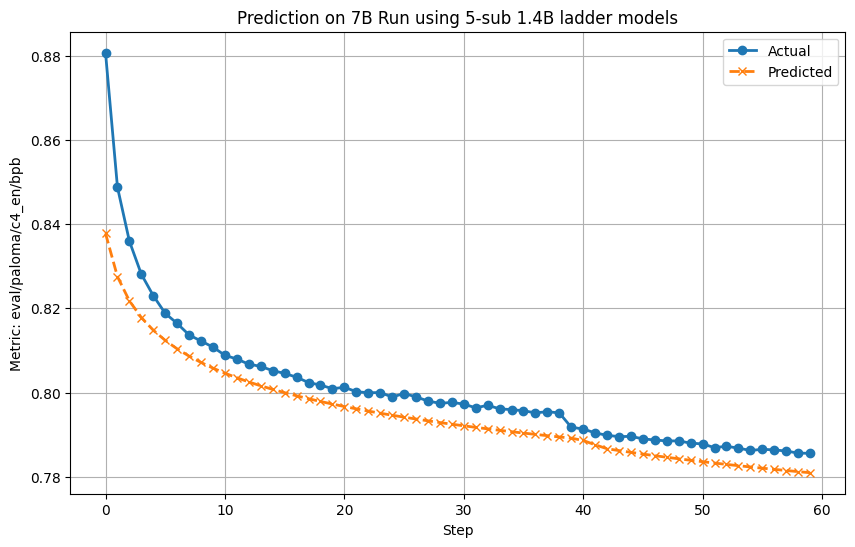

In [27]:
actual, predicted = fit_task_loss_from_ladder_models(
        runs=RUNS,
        entity=ENTITY,
        project=PROJECT,
        metrics=[TASK_LOSS, TOKENS_COL, TASK_ACCURACY],
        pred_run=PRED_RUN,
        task_loss=TASK_LOSS,
        aggregation=AGGREGATION,
        tokens_col=TOKENS_COL,
        param_col=PARAM_COL,
        param_col_to_use=PARAM_COL,
        use_log_for_ND=True,
        normalize_ND=True,
    )

plot_actual_vs_predicted(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

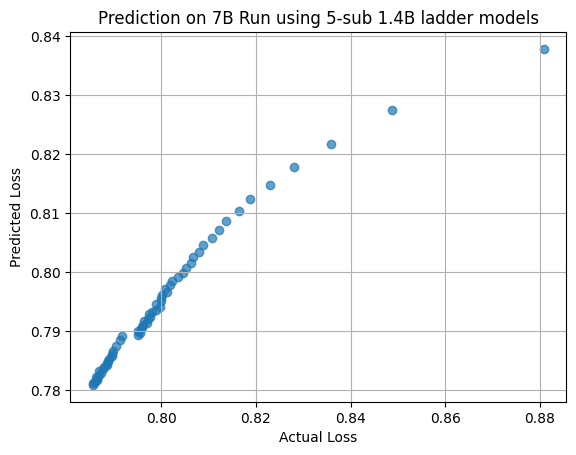

In [28]:
plot_fit(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

In [29]:
print(len(actual))
print(len(predicted))

60
60


## Predict task accuracy from task loss

In [30]:
importlib.reload(utils)


# get accuracy, which is hellaswag accuracy
actual_acc, pred_acc = fit_accuracy_from_task_loss(
    pred_task_losses=predicted,
    runs=RUNS,
    entity=ENTITY,
    project=PROJECT,
    x_axis="throughput/total_gflops",
    tokens_col=TOKENS_COL,
    pred_run=PRED_RUN,
    aggregation=AGGREGATION,
    task_loss_col=TASK_LOSS,
    accuracy_col=TASK_ACCURACY,
)

Number of rows in ladder_df_agg: 23
Number of rows in pred_df_agg: 21
Number of rows in task_losses: 23
Number of rows in acc: 23


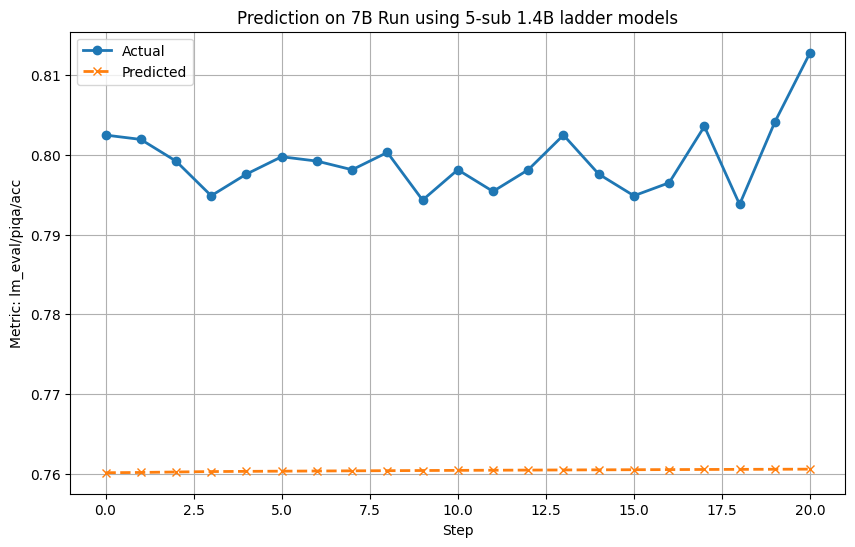

In [31]:
plot_actual_vs_predicted(actual_acc, pred_acc, title="Prediction on 7B Run using 5-sub 1.4B ladder models", task_metric=TASK_ACCURACY)